# Trainingsdaten erzeugen

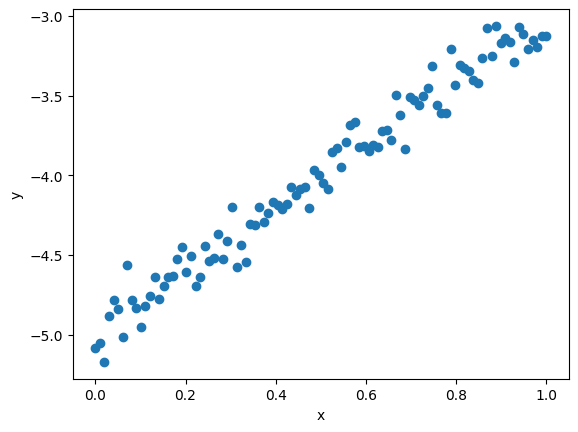

In [12]:
import numpy as np
x = np.linspace(0.0, 1.0, 100)
y = -5 + 2*x + 0.1*np.random.randn(len(x))

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# MLP mit TensorFlow/Keras

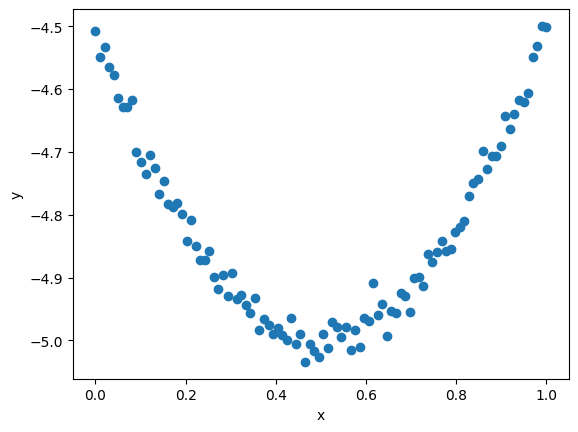

Model: "MyFirstMLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

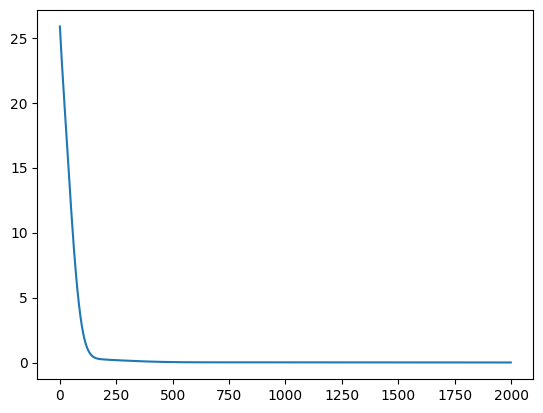

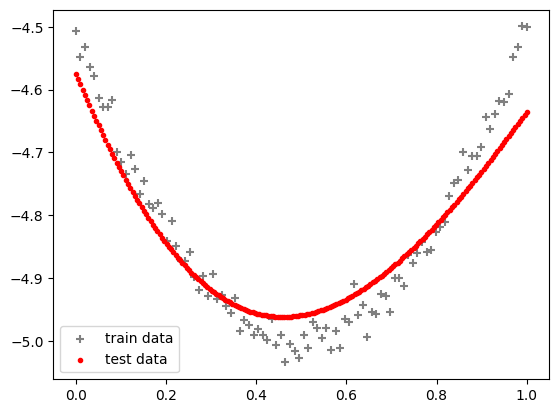

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

# 1. Trainingsdaten vorbereiten
x = np.linspace(0.0, 1.0, 100)
#y = -5 + 2*x + 0.1*np.random.randn(len(x))
y = -5 + 2*(x-0.5)**2 + 0.02*np.random.randn(len(x))
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2. Modell trainieren
model = tf.keras.Sequential(name="MyFirstMLP")
model.add(tf.keras.layers.InputLayer(shape=(1,)))
model.add(tf.keras.layers.Dense(10, activation="tanh", name="hidden1"))
model.add(tf.keras.layers.Dense(1, name="output"))
model.compile(loss="mse", optimizer="adam")
model.summary()
h = model.fit(x,y, epochs=2000, verbose=0)

plt.plot(h.history["loss"])
plt.show()

# 3. Modell testen / Testprädiktionen visualisieren
x_test = np.linspace(0,1,200).reshape(200,1)
y_preds = model.predict( x_test, verbose=0 )
plt.scatter(x,y, marker="+", color="gray", label="train data")
plt.scatter(x_test.flatten(), y_preds.flatten(), marker=".", color="red", label="test data")
plt.legend()
plt.show()

